# Install Dependencis

In [ ]:
!pip install tensorflow_version==1.15.0
!pip install "gym==0.19"
!pip install stable-baselines[mpi]==2.9.0


In [ ]:
! git clone https://github.com/maryamkheirkhah/gym-pcgrl.git


In [ ]:
import os
os.chdir('gym-pcgrl')
!pip install -e .

In [1]:
import tensorflow as tf
print(tf.__version__)
import stable_baselines
print(stable_baselines.__version__)
import gym
print(gym.__version__)

1.15.0
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

2.9.0
0.19.0


In [ ]:
%pwd
%cd gym-pcgrl

In [2]:
import model
from model import FullyConvPolicyBigMap, FullyConvPolicySmallMap, CustomPolicyBigMap, CustomPolicySmallMap
from utils import get_exp_name, max_exp_idx, load_model, make_vec_envs
from stable_baselines import PPO2
from stable_baselines.results_plotter import load_results, ts2xy
import tensorflow as tf
import numpy as np
import os
import matplotlib as plot


In [2]:
print("Number of CPUs:", os.cpu_count())

Number of CPUs: 8


# Train

In [ ]:
#pip install tensorflow==1.15
#Install stable-baselines as described in the documentation
print("first")
import model
from model import FullyConvPolicyBigMap, FullyConvPolicySmallMap, CustomPolicyBigMap, CustomPolicySmallMap
from utils import get_exp_name, max_exp_idx, load_model, make_vec_envs
from stable_baselines import PPO2
from stable_baselines.results_plotter import load_results, ts2xy
import tensorflow as tf
import numpy as np
import os

n_steps = 0
log_dir = './'
best_mean_reward, n_steps = -np.inf, 0

def callback(_locals, _globals):
    print("in callback")
    """
    Callback called at each step (for DQN an others) or after n steps (see ACER or PPO2)
    :param _locals: (dict)
    :param _globals: (dict)
    """
    global n_steps, best_mean_reward
    # Print stats every 1000 calls
    if (n_steps + 1) % 10 == 0:
        x, y = ts2xy(load_results(log_dir), 'timesteps')
        if len(x) > 100:
           #pdb.set_trace()
            mean_reward = np.mean(y[-100:])
            print(x[-1], 'timesteps')
            print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(best_mean_reward, mean_reward))

            # New best model, we save the agent here
            if mean_reward > best_mean_reward:
                best_mean_reward = mean_reward
                # Example for saving best model
                print("Saving new best model")
                _locals['self'].save(os.path.join(log_dir, 'best_model.pkl'))
            else:
                print("Saving latest model")
                _locals['self'].save(os.path.join(log_dir, 'latest_model.pkl'))
        else:
            print('{} monitor entries'.format(len(x)))
            pass
    n_steps += 1
    # Returning False will stop training early
    return True


def main(game, representation, experiment, steps, n_cpu, render, logging, **kwargs):
    print("in main")
    env_name = '{}-{}-v0'.format(game, representation)
    exp_name = get_exp_name(game, representation, experiment, **kwargs)
    resume = kwargs.get('resume', False)
    if representation == 'wide':
        policy = FullyConvPolicyBigMap
        if game == "sokoban":
            policy = FullyConvPolicySmallMap
    else:
        policy = CustomPolicyBigMap
        if game == "sokoban":
            policy = CustomPolicySmallMap
    if game == "binary":
        kwargs['cropped_size'] = 28
    elif game == "zelda":
        kwargs['cropped_size'] = 22
    elif game == "sokoban":
        kwargs['cropped_size'] = 10
    n = max_exp_idx(exp_name)
    global log_dir
    if not resume:
        print("resume")
        n = n + 1
    log_dir = 'runs/{}_{}_{}'.format(exp_name, n, 'log')
    if not resume:
        print("make resume")
        os.makedirs(log_dir)
    else:
        print("load model")
        model = load_model(log_dir)
    kwargs = {
        **kwargs,
        'render_rank': 0,
        'render': render,
    }
    used_dir = log_dir
    if not logging:
        print("1")
        used_dir = None
    env = make_vec_envs(env_name, representation, log_dir, n_cpu, **kwargs)
    if not resume or model is None:
        print("2")
        model = PPO2(policy, env, verbose=1, tensorboard_log="./runs")
    else:
        print("3")
        model.set_env(env)
    if not logging:
        print("4")
        model.learn(total_timesteps=int(steps), tb_log_name=exp_name)
    else:
        print("5")
        model.learn(total_timesteps=int(steps), tb_log_name=exp_name, callback=callback)

################################## MAIN ########################################
games =['binary','zelda','sokoban']
representations = ['narrow','turtle','wide']
# Fill these parameters according to your equipments and wishes 
experiment = None
steps = 10000
render = True
logging = True
n_cpu = 1
kwargs = {
    'resume': False
}
for g in games:
    for r in representations:
        if __name__ == '__main__':
            main(g, r, experiment, steps, n_cpu, render, logging, **kwargs)


first
in main
resume
make resume
2
5

--------------------------------------
| approxkl           | 0.0023612585  |
| clipfrac           | 0.0           |
| ep_len_mean        | 112           |
| ep_reward_mean     | -66           |
| explained_variance | 0.000691      |
| fps                | 15            |
| n_updates          | 1             |
| policy_entropy     | 1.0964644     |
| policy_loss        | -0.0104910955 |
| serial_timesteps   | 128           |
| time_elapsed       | 0             |
| total_timesteps    | 128           |
| value_loss         | 53.543747     |
--------------------------------------
in callback
--------------------------------------
| approxkl           | 0.0011877734  |
| clipfrac           | 0.0           |
| ep_len_mean        | 120           |
| ep_reward_mean     | -33           |
| explained_variance | 0.0424        |
| fps                | 42            |
| n_updates          | 2             |
| policy_entropy     | 1.0854061     |
| policy_loss 

in callback
--------------------------------------
| approxkl           | 0.0034446581  |
| clipfrac           | 0.052734375   |
| ep_len_mean        | 123           |
| ep_reward_mean     | 5.21          |
| explained_variance | -16.1         |
| fps                | 49            |
| n_updates          | 15            |
| policy_entropy     | 0.7925719     |
| policy_loss        | -0.0063004238 |
| serial_timesteps   | 1920          |
| time_elapsed       | 46.4          |
| total_timesteps    | 1920          |
| value_loss         | 0.045235246   |
--------------------------------------
in callback
-------------------------------------
| approxkl           | 0.006459683  |
| clipfrac           | 0.1171875    |
| ep_len_mean        | 136          |
| ep_reward_mean     | 4.87         |
| explained_variance | -96          |
| fps                | 45           |
| n_updates          | 16           |
| policy_entropy     | 0.9020793    |
| policy_loss        | -0.011814591 |
| serial_ti

in callback
-------------------------------------
| approxkl           | 0.0041186637 |
| clipfrac           | 0.064453125  |
| ep_len_mean        | 134          |
| ep_reward_mean     | 7.44         |
| explained_variance | -0.00847     |
| fps                | 44           |
| n_updates          | 29           |
| policy_entropy     | 0.73083985   |
| policy_loss        | -0.008156774 |
| serial_timesteps   | 3712         |
| time_elapsed       | 87.5         |
| total_timesteps    | 3712         |
| value_loss         | 34.889416    |
-------------------------------------
in callback
-------------------------------------
| approxkl           | 0.0027670125 |
| clipfrac           | 0.001953125  |
| ep_len_mean        | 131          |
| ep_reward_mean     | 8.14         |
| explained_variance | 0.0781       |
| fps                | 44           |
| n_updates          | 30           |
| policy_entropy     | 0.78914684   |
| policy_loss        | -0.005409089 |
| serial_timesteps   | 384

in callback
--------------------------------------
| approxkl           | 0.0032243012  |
| clipfrac           | 0.0           |
| ep_len_mean        | 150           |
| ep_reward_mean     | 6.92          |
| explained_variance | 0.0188        |
| fps                | 46            |
| n_updates          | 43            |
| policy_entropy     | 0.82457983    |
| policy_loss        | -0.0051240493 |
| serial_timesteps   | 5504          |
| time_elapsed       | 125           |
| total_timesteps    | 5504          |
| value_loss         | 17.195375     |
--------------------------------------
in callback
-------------------------------------
| approxkl           | 0.006218266  |
| clipfrac           | 0.056640625  |
| ep_len_mean        | 150          |
| ep_reward_mean     | 6.92         |
| explained_variance | -0.0834      |
| fps                | 51           |
| n_updates          | 44           |
| policy_entropy     | 0.8040279    |
| policy_loss        | -0.011693049 |
| serial_ti

in callback
--------------------------------------
| approxkl           | 0.008636542   |
| clipfrac           | 0.123046875   |
| ep_len_mean        | 166           |
| ep_reward_mean     | 10.9          |
| explained_variance | -156          |
| fps                | 50            |
| n_updates          | 57            |
| policy_entropy     | 0.7329159     |
| policy_loss        | -0.0072795125 |
| serial_timesteps   | 7296          |
| time_elapsed       | 163           |
| total_timesteps    | 7296          |
| value_loss         | 0.011729461   |
--------------------------------------
in callback
-------------------------------------
| approxkl           | 0.006644936  |
| clipfrac           | 0.052734375  |
| ep_len_mean        | 166          |
| ep_reward_mean     | 10.9         |
| explained_variance | 0.0138       |
| fps                | 50           |
| n_updates          | 58           |
| policy_entropy     | 0.7332427    |
| policy_loss        | -0.009750223 |
| serial_ti

in callback
50 monitor entries
-------------------------------------
| approxkl           | 0.00873324   |
| clipfrac           | 0.12109375   |
| ep_len_mean        | 175          |
| ep_reward_mean     | 7.92         |
| explained_variance | -0.0796      |
| fps                | 51           |
| n_updates          | 71           |
| policy_entropy     | 0.7748829    |
| policy_loss        | -0.017743766 |
| serial_timesteps   | 9088         |
| time_elapsed       | 200          |
| total_timesteps    | 9088         |
| value_loss         | 0.089948185  |
-------------------------------------
in callback
-------------------------------------
| approxkl           | 0.010714879  |
| clipfrac           | 0.091796875  |
| ep_len_mean        | 175          |
| ep_reward_mean     | 7.92         |
| explained_variance | -0.1         |
| fps                | 49           |
| n_updates          | 72           |
| policy_entropy     | 0.81332      |
| policy_loss        | -0.016666885 |
| seria

in callback
--------------------------------------
| approxkl           | 0.002603582   |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 398           |
| ep_reward_mean     | -5.5          |
| explained_variance | 0.0206        |
| fps                | 51            |
| n_updates          | 8             |
| policy_entropy     | 1.7292957     |
| policy_loss        | -0.0074207527 |
| serial_timesteps   | 1024          |
| time_elapsed       | 19.4          |
| total_timesteps    | 1024          |
| value_loss         | 7.5141883     |
--------------------------------------
in callback
--------------------------------------
| approxkl           | 0.0074737184  |
| clipfrac           | 0.14453125    |
| ep_len_mean        | 398           |
| ep_reward_mean     | -5.5          |
| explained_variance | 0.0037        |
| fps                | 51            |
| n_updates          | 9             |
| policy_entropy     | 1.6721894     |
| policy_loss        | -0.0146085275 |
|

in callback
-------------------------------------
| approxkl           | 0.0040091677 |
| clipfrac           | 0.03515625   |
| ep_len_mean        | 341          |
| ep_reward_mean     | -0.125       |
| explained_variance | 0.00986      |
| fps                | 51           |
| n_updates          | 22           |
| policy_entropy     | 1.716521     |
| policy_loss        | -0.01222134  |
| serial_timesteps   | 2816         |
| time_elapsed       | 55.4         |
| total_timesteps    | 2816         |
| value_loss         | 5.921302     |
-------------------------------------
in callback
8 monitor entries
--------------------------------------
| approxkl           | 0.002231103   |
| clipfrac           | 0.001953125   |
| ep_len_mean        | 341           |
| ep_reward_mean     | -0.125        |
| explained_variance | 0.0318        |
| fps                | 50            |
| n_updates          | 23            |
| policy_entropy     | 1.7252138     |
| policy_loss        | -0.0046145828 

in callback
---------------------------------------
| approxkl           | 0.0019053741   |
| clipfrac           | 0.01171875     |
| ep_len_mean        | 350            |
| ep_reward_mean     | 7.92           |
| explained_variance | 0.0115         |
| fps                | 47             |
| n_updates          | 36             |
| policy_entropy     | 1.6336492      |
| policy_loss        | -0.00091523817 |
| serial_timesteps   | 4608           |
| time_elapsed       | 90.8           |
| total_timesteps    | 4608           |
| value_loss         | 5.470834       |
---------------------------------------
in callback
--------------------------------------
| approxkl           | 0.0010563784  |
| clipfrac           | 0.005859375   |
| ep_len_mean        | 363           |
| ep_reward_mean     | 8.54          |
| explained_variance | -0.0293       |
| fps                | 50            |
| n_updates          | 37            |
| policy_entropy     | 1.629326      |
| policy_loss        | -0

in callback
-------------------------------------
| approxkl           | 0.0054486995 |
| clipfrac           | 0.0625       |
| ep_len_mean        | 389          |
| ep_reward_mean     | 7.44         |
| explained_variance | -0.0586      |
| fps                | 51           |
| n_updates          | 50           |
| policy_entropy     | 1.6042432    |
| policy_loss        | -0.008754021 |
| serial_timesteps   | 6400         |
| time_elapsed       | 127          |
| total_timesteps    | 6400         |
| value_loss         | 0.8530202    |
-------------------------------------
in callback
--------------------------------------
| approxkl           | 0.0040572695  |
| clipfrac           | 0.02734375    |
| ep_len_mean        | 389           |
| ep_reward_mean     | 7.44          |
| explained_variance | 0.00147       |
| fps                | 49            |
| n_updates          | 51            |
| policy_entropy     | 1.6096661     |
| policy_loss        | -0.0028816592 |
| serial_timeste

in callback
--------------------------------------
| approxkl           | 0.0036112797  |
| clipfrac           | 0.046875      |
| ep_len_mean        | 395           |
| ep_reward_mean     | 8.45          |
| explained_variance | -16.2         |
| fps                | 51            |
| n_updates          | 64            |
| policy_entropy     | 1.2709808     |
| policy_loss        | -0.0030054336 |
| serial_timesteps   | 8192          |
| time_elapsed       | 162           |
| total_timesteps    | 8192          |
| value_loss         | 0.004417363   |
--------------------------------------
in callback
--------------------------------------
| approxkl           | 0.00688475    |
| clipfrac           | 0.0859375     |
| ep_len_mean        | 395           |
| ep_reward_mean     | 8.45          |
| explained_variance | -7.74         |
| fps                | 53            |
| n_updates          | 65            |
| policy_entropy     | 1.3043461     |
| policy_loss        | -0.0146833835 |
|

in callback
-------------------------------------
| approxkl           | 0.009674259  |
| clipfrac           | 0.15429688   |
| ep_len_mean        | 415          |
| ep_reward_mean     | 9.3          |
| explained_variance | 0.0502       |
| fps                | 53           |
| n_updates          | 78           |
| policy_entropy     | 1.4275355    |
| policy_loss        | -0.009632803 |
| serial_timesteps   | 9984         |
| time_elapsed       | 196          |
| total_timesteps    | 9984         |
| value_loss         | 0.97955924   |
-------------------------------------
in callback
in main
resume
make resume
2


Exception ignored in: <function SimpleImageViewer.__del__ at 0x000001E1C7915AF8>
Traceback (most recent call last):
  File "C:\Python37\lib\site-packages\gym\envs\classic_control\rendering.py", line 458, in __del__
    self.close()
  File "C:\Python37\lib\site-packages\gym\envs\classic_control\rendering.py", line 454, in close
    self.window.close()
  File "C:\Python37\lib\site-packages\pyglet\window\win32\__init__.py", line 299, in close
    super(Win32Window, self).close()
  File "C:\Python37\lib\site-packages\pyglet\window\__init__.py", line 823, in close
    app.windows.remove(self)
  File "C:\Python37\lib\_weakrefset.py", line 109, in remove
    self.data.remove(ref(item))
KeyError: (<weakref at 0x000001E1C7E23EF8; to 'Win32Window' at 0x000001E1C7E34548>,)


5
------------------------------------
| approxkl           | 0.018423844 |
| clipfrac           | 0.24414062  |
| ep_len_mean        | 76          |
| ep_reward_mean     | 14          |
| explained_variance | 0.000695    |
| fps                | 14          |
| n_updates          | 1           |
| policy_entropy     | 5.86734     |
| policy_loss        | -0.05612786 |
| serial_timesteps   | 128         |
| time_elapsed       | 0           |
| total_timesteps    | 128         |
| value_loss         | 17.482595   |
------------------------------------
in callback
------------------------------------
| approxkl           | 0.011717552 |
| clipfrac           | 0.14648438  |
| ep_len_mean        | 77.3        |
| ep_reward_mean     | -26.3       |
| explained_variance | -0.00131    |
| fps                | 17          |
| n_updates          | 2           |
| policy_entropy     | 5.895923    |
| policy_loss        | -0.03197624 |
| serial_timesteps   | 256         |
| time_elapsed       | 9

in callback
-------------------------------------
| approxkl           | 0.018969096  |
| clipfrac           | 0.24414062   |
| ep_len_mean        | 84.5         |
| ep_reward_mean     | -21.4        |
| explained_variance | 0.000963     |
| fps                | 17           |
| n_updates          | 16           |
| policy_entropy     | 5.741884     |
| policy_loss        | -0.054979272 |
| serial_timesteps   | 2048         |
| time_elapsed       | 110          |
| total_timesteps    | 2048         |
| value_loss         | 12.043713    |
-------------------------------------
in callback
-------------------------------------
| approxkl           | 0.011343681  |
| clipfrac           | 0.16210938   |
| ep_len_mean        | 84.2         |
| ep_reward_mean     | -21.4        |
| explained_variance | -0.0263      |
| fps                | 17           |
| n_updates          | 17           |
| policy_entropy     | 5.7374015    |
| policy_loss        | -0.043960206 |
| serial_timesteps   | 217

in callback
-------------------------------------
| approxkl           | 0.020235242  |
| clipfrac           | 0.24804688   |
| ep_len_mean        | 99           |
| ep_reward_mean     | -16.5        |
| explained_variance | -0.0399      |
| fps                | 19           |
| n_updates          | 31           |
| policy_entropy     | 4.9809456    |
| policy_loss        | -0.024668932 |
| serial_timesteps   | 3968         |
| time_elapsed       | 216          |
| total_timesteps    | 3968         |
| value_loss         | 5.687558     |
-------------------------------------
in callback
------------------------------------
| approxkl           | 0.02109667  |
| clipfrac           | 0.27539062  |
| ep_len_mean        | 99.7        |
| ep_reward_mean     | -16.5       |
| explained_variance | 0.0256      |
| fps                | 18          |
| n_updates          | 32          |
| policy_entropy     | 4.6719117   |
| policy_loss        | -0.03373558 |
| serial_timesteps   | 4096        |

in callback
------------------------------------
| approxkl           | 0.022518551 |
| clipfrac           | 0.27734375  |
| ep_len_mean        | 107         |
| ep_reward_mean     | -10.3       |
| explained_variance | -0.0166     |
| fps                | 19          |
| n_updates          | 46          |
| policy_entropy     | 4.716795    |
| policy_loss        | -0.03264007 |
| serial_timesteps   | 5888        |
| time_elapsed       | 323         |
| total_timesteps    | 5888        |
| value_loss         | 3.0901392   |
------------------------------------
in callback
------------------------------------
| approxkl           | 0.032032046 |
| clipfrac           | 0.3203125   |
| ep_len_mean        | 113         |
| ep_reward_mean     | -8.83       |
| explained_variance | 0.0472      |
| fps                | 19          |
| n_updates          | 47          |
| policy_entropy     | 4.49193     |
| policy_loss        | -0.02810354 |
| serial_timesteps   | 6016        |
| time_elapsed

in callback
-------------------------------------
| approxkl           | 0.026470453  |
| clipfrac           | 0.33203125   |
| ep_len_mean        | 117          |
| ep_reward_mean     | -4.6         |
| explained_variance | -0.0468      |
| fps                | 19           |
| n_updates          | 61           |
| policy_entropy     | 5.0789146    |
| policy_loss        | -0.014624365 |
| serial_timesteps   | 7808         |
| time_elapsed       | 429          |
| total_timesteps    | 7808         |
| value_loss         | 1.924158     |
-------------------------------------
in callback
------------------------------------
| approxkl           | 0.04520948  |
| clipfrac           | 0.41210938  |
| ep_len_mean        | 120         |
| ep_reward_mean     | -4.36       |
| explained_variance | -0.0392     |
| fps                | 16          |
| n_updates          | 62          |
| policy_entropy     | 4.289556    |
| policy_loss        | -0.02059691 |
| serial_timesteps   | 7936        |

in callback
-------------------------------------
| approxkl           | 0.04609882   |
| clipfrac           | 0.3828125    |
| ep_len_mean        | 103          |
| ep_reward_mean     | 4.43         |
| explained_variance | 0.0955       |
| fps                | 17           |
| n_updates          | 76           |
| policy_entropy     | 2.5784438    |
| policy_loss        | -0.009717405 |
| serial_timesteps   | 9728         |
| time_elapsed       | 542          |
| total_timesteps    | 9728         |
| value_loss         | 109.94212    |
-------------------------------------
in callback
-------------------------------------
| approxkl           | 0.038299132  |
| clipfrac           | 0.39648438   |
| ep_len_mean        | 104          |
| ep_reward_mean     | 5.15         |
| explained_variance | 0.2          |
| fps                | 18           |
| n_updates          | 77           |
| policy_entropy     | 4.4932504    |
| policy_loss        | 0.0030324126 |
| serial_timesteps   | 985

Exception ignored in: <function SimpleImageViewer.__del__ at 0x000001E1C7915AF8>
Traceback (most recent call last):
  File "C:\Python37\lib\site-packages\gym\envs\classic_control\rendering.py", line 458, in __del__
    self.close()
  File "C:\Python37\lib\site-packages\gym\envs\classic_control\rendering.py", line 454, in close
    self.window.close()
  File "C:\Python37\lib\site-packages\pyglet\window\win32\__init__.py", line 299, in close
    super(Win32Window, self).close()
  File "C:\Python37\lib\site-packages\pyglet\window\__init__.py", line 823, in close
    app.windows.remove(self)
  File "C:\Python37\lib\_weakrefset.py", line 109, in remove
    self.data.remove(ref(item))
KeyError: <weakref at 0x000001E1CD6C8548; to 'Win32Window' at 0x000001E1CD6C7808>
Exception ignored in: <function SimpleImageViewer.__del__ at 0x000001E1C7915AF8>
Traceback (most recent call last):
  File "C:\Python37\lib\site-packages\gym\envs\classic_control\rendering.py", line 458, in __del__
    self.close(

5
------------------------------------
| approxkl           | 0.001106638 |
| clipfrac           | 0.0         |
| ep_len_mean        | 18.8        |
| ep_reward_mean     | -4.83       |
| explained_variance | 0.00328     |
| fps                | 29          |
| n_updates          | 1           |
| policy_entropy     | 2.1962109   |
| policy_loss        | -0.01464282 |
| serial_timesteps   | 128         |
| time_elapsed       | 0           |
| total_timesteps    | 128         |
| value_loss         | 10.012413   |
------------------------------------
in callback
-------------------------------------
| approxkl           | 0.0006410086 |
| clipfrac           | 0.0          |
| ep_len_mean        | 19           |
| ep_reward_mean     | -13.5        |
| explained_variance | -0.000368    |
| fps                | 58           |
| n_updates          | 2            |
| policy_entropy     | 2.1908684    |
| policy_loss        | -0.004116973 |
| serial_timesteps   | 256          |
| time_elapse

in callback
-------------------------------------
| approxkl           | 0.004913576  |
| clipfrac           | 0.05078125   |
| ep_len_mean        | 21.8         |
| ep_reward_mean     | -6.22        |
| explained_variance | 0.00844      |
| fps                | 64           |
| n_updates          | 15           |
| policy_entropy     | 1.316665     |
| policy_loss        | -0.005594196 |
| serial_timesteps   | 1920         |
| time_elapsed       | 31.4         |
| total_timesteps    | 1920         |
| value_loss         | 35.020836    |
-------------------------------------
in callback
-------------------------------------
| approxkl           | 0.0038011833 |
| clipfrac           | 0.05078125   |
| ep_len_mean        | 22.1         |
| ep_reward_mean     | -5.66        |
| explained_variance | -0.0147      |
| fps                | 57           |
| n_updates          | 16           |
| policy_entropy     | 1.1607075    |
| policy_loss        | -0.008146466 |
| serial_timesteps   | 204

in callback
--------------------------------------
| approxkl           | 0.00016212821 |
| clipfrac           | 0.0           |
| ep_len_mean        | 30.2          |
| ep_reward_mean     | 2.81          |
| explained_variance | 0.0193        |
| fps                | 65            |
| n_updates          | 29            |
| policy_entropy     | 0.16163042    |
| policy_loss        | -0.0015480582 |
| serial_timesteps   | 3712          |
| time_elapsed       | 59.6          |
| total_timesteps    | 3712          |
| value_loss         | 6.403401      |
--------------------------------------
in callback
-------------------------------------
| approxkl           | 0.0025625983 |
| clipfrac           | 0.0234375    |
| ep_len_mean        | 31.1         |
| ep_reward_mean     | 3.58         |
| explained_variance | -0.015       |
| fps                | 66           |
| n_updates          | 30           |
| policy_entropy     | 0.112190366  |
| policy_loss        | 0.0026106995 |
| serial_ti

in callback
---------------------------------------
| approxkl           | 0.00028376564  |
| clipfrac           | 0.00390625     |
| ep_len_mean        | 40.4           |
| ep_reward_mean     | 8.67           |
| explained_variance | 0.0949         |
| fps                | 65             |
| n_updates          | 43             |
| policy_entropy     | 0.030496046    |
| policy_loss        | -0.00018639374 |
| serial_timesteps   | 5504           |
| time_elapsed       | 86.9           |
| total_timesteps    | 5504           |
| value_loss         | 21.018162      |
---------------------------------------
in callback
---------------------------------------
| approxkl           | 2.865387e-07   |
| clipfrac           | 0.0            |
| ep_len_mean        | 41.2           |
| ep_reward_mean     | 9.09           |
| explained_variance | -0.059         |
| fps                | 67             |
| n_updates          | 44             |
| policy_entropy     | 0.043081746    |
| policy_loss   

in callback
7167 timesteps
Best mean reward: 9.52 - Last mean reward per episode: 11.37
Saving new best model
---------------------------------------
| approxkl           | 0.00040773564  |
| clipfrac           | 0.00390625     |
| ep_len_mean        | 47.5           |
| ep_reward_mean     | 11.5           |
| explained_variance | 0.233          |
| fps                | 66             |
| n_updates          | 57             |
| policy_entropy     | 0.0745629      |
| policy_loss        | -0.00096866896 |
| serial_timesteps   | 7296           |
| time_elapsed       | 114            |
| total_timesteps    | 7296           |
| value_loss         | 11.073403      |
---------------------------------------
in callback
--------------------------------------
| approxkl           | 1.3361901e-07 |
| clipfrac           | 0.0           |
| ep_len_mean        | 47.8          |
| ep_reward_mean     | 11.5          |
| explained_variance | 0.228         |
| fps                | 66            |
| n_u

in callback
---------------------------------------
| approxkl           | 0.00019281392  |
| clipfrac           | 0.0            |
| ep_len_mean        | 47.6           |
| ep_reward_mean     | 13.4           |
| explained_variance | 0.362          |
| fps                | 67             |
| n_updates          | 71             |
| policy_entropy     | 0.23987618     |
| policy_loss        | -0.00087981997 |
| serial_timesteps   | 9088           |
| time_elapsed       | 142            |
| total_timesteps    | 9088           |
| value_loss         | 20.242077      |
---------------------------------------
in callback
--------------------------------------
| approxkl           | 0.0003249701  |
| clipfrac           | 0.0078125     |
| ep_len_mean        | 47.9          |
| ep_reward_mean     | 13.6          |
| explained_variance | 0.0309        |
| fps                | 67            |
| n_updates          | 72            |
| policy_entropy     | 0.28937507    |
| policy_loss        | -0

in callback
-------------------------------------
| approxkl           | 0.003044379  |
| clipfrac           | 0.017578125  |
| ep_len_mean        | 23.5         |
| ep_reward_mean     | -3.16        |
| explained_variance | 0.0302       |
| fps                | 67           |
| n_updates          | 7            |
| policy_entropy     | 2.3424177    |
| policy_loss        | -0.014231231 |
| serial_timesteps   | 896          |
| time_elapsed       | 13.5         |
| total_timesteps    | 896          |
| value_loss         | 2.707478     |
-------------------------------------
in callback
--------------------------------------
| approxkl           | 0.0021701525  |
| clipfrac           | 0.0           |
| ep_len_mean        | 23.4          |
| ep_reward_mean     | -2.77         |
| explained_variance | 0.00876       |
| fps                | 66            |
| n_updates          | 8             |
| policy_entropy     | 2.2903774     |
| policy_loss        | -0.0046373038 |
| serial_timeste

in callback
-------------------------------------
| approxkl           | 0.010360803  |
| clipfrac           | 0.25585938   |
| ep_len_mean        | 22.3         |
| ep_reward_mean     | -0.85        |
| explained_variance | 0.0929       |
| fps                | 66           |
| n_updates          | 21           |
| policy_entropy     | 1.350726     |
| policy_loss        | -0.012071575 |
| serial_timesteps   | 2688         |
| time_elapsed       | 41.6         |
| total_timesteps    | 2688         |
| value_loss         | 1.1686366    |
-------------------------------------
in callback
---------------------------------------
| approxkl           | 0.00371846     |
| clipfrac           | 0.01953125     |
| ep_len_mean        | 22.3           |
| ep_reward_mean     | -0.45          |
| explained_variance | 0.00935        |
| fps                | 65             |
| n_updates          | 22             |
| policy_entropy     | 1.2742275      |
| policy_loss        | -0.00095053494 |
| seri

in callback
-------------------------------------
| approxkl           | 0.0125467125 |
| clipfrac           | 0.2734375    |
| ep_len_mean        | 24           |
| ep_reward_mean     | 0.19         |
| explained_variance | -0.0164      |
| fps                | 66           |
| n_updates          | 35           |
| policy_entropy     | 1.3903284    |
| policy_loss        | -0.015632985 |
| serial_timesteps   | 4480         |
| time_elapsed       | 68.6         |
| total_timesteps    | 4480         |
| value_loss         | 1.2314104    |
-------------------------------------
in callback
-------------------------------------
| approxkl           | 0.010774558  |
| clipfrac           | 0.17382812   |
| ep_len_mean        | 24.1         |
| ep_reward_mean     | 0.25         |
| explained_variance | -0.0178      |
| fps                | 66           |
| n_updates          | 36           |
| policy_entropy     | 1.3158662    |
| policy_loss        | -0.008613013 |
| serial_timesteps   | 460

in callback
6120 timesteps
Best mean reward: 13.04 - Last mean reward per episode: -0.10
Saving latest model
------------------------------------
| approxkl           | 0.000534989 |
| clipfrac           | 0.0         |
| ep_len_mean        | 25.3        |
| ep_reward_mean     | -0.12       |
| explained_variance | 0.0287      |
| fps                | 68          |
| n_updates          | 49          |
| policy_entropy     | 0.75399363  |
| policy_loss        | 0.002088507 |
| serial_timesteps   | 6272        |
| time_elapsed       | 95.8        |
| total_timesteps    | 6272        |
| value_loss         | 0.65706855  |
------------------------------------
in callback
--------------------------------------
| approxkl           | 0.004506738   |
| clipfrac           | 0.060546875   |
| ep_len_mean        | 25.6          |
| ep_reward_mean     | -0.07         |
| explained_variance | 0.0373        |
| fps                | 68            |
| n_updates          | 50            |
| policy_ent

in callback
-------------------------------------
| approxkl           | 0.01906192   |
| clipfrac           | 0.21289062   |
| ep_len_mean        | 28           |
| ep_reward_mean     | 0.32         |
| explained_variance | -0.000537    |
| fps                | 64           |
| n_updates          | 63           |
| policy_entropy     | 1.3440797    |
| policy_loss        | -0.014543795 |
| serial_timesteps   | 8064         |
| time_elapsed       | 123          |
| total_timesteps    | 8064         |
| value_loss         | 6.254652     |
-------------------------------------
in callback
------------------------------------
| approxkl           | 0.017599368 |
| clipfrac           | 0.37695312  |
| ep_len_mean        | 28.2        |
| ep_reward_mean     | 0.34        |
| explained_variance | -0.125      |
| fps                | 66          |
| n_updates          | 64          |
| policy_entropy     | 1.4712683   |
| policy_loss        | -0.02118526 |
| serial_timesteps   | 8192        |

in callback
-------------------------------------
| approxkl           | 0.012282146  |
| clipfrac           | 0.17773438   |
| ep_len_mean        | 22.1         |
| ep_reward_mean     | 0.51         |
| explained_variance | 0.0518       |
| fps                | 61           |
| n_updates          | 77           |
| policy_entropy     | 1.724402     |
| policy_loss        | -0.010891125 |
| serial_timesteps   | 9856         |
| time_elapsed       | 151          |
| total_timesteps    | 9856         |
| value_loss         | 0.8884284    |
-------------------------------------
in callback
-------------------------------------
| approxkl           | 0.010802098  |
| clipfrac           | 0.21679688   |
| ep_len_mean        | 21.8         |
| ep_reward_mean     | 0.66         |
| explained_variance | -0.141       |
| fps                | 60           |
| n_updates          | 78           |
| policy_entropy     | 1.7315377    |
| policy_loss        | -0.026841957 |
| serial_timesteps   | 998

Exception ignored in: <function SimpleImageViewer.__del__ at 0x000001E1C7915AF8>
Traceback (most recent call last):
  File "C:\Python37\lib\site-packages\gym\envs\classic_control\rendering.py", line 458, in __del__
    self.close()
  File "C:\Python37\lib\site-packages\gym\envs\classic_control\rendering.py", line 454, in close
    self.window.close()
  File "C:\Python37\lib\site-packages\pyglet\window\win32\__init__.py", line 299, in close
    super(Win32Window, self).close()
  File "C:\Python37\lib\site-packages\pyglet\window\__init__.py", line 823, in close
    app.windows.remove(self)
  File "C:\Python37\lib\_weakrefset.py", line 109, in remove
    self.data.remove(ref(item))
KeyError: (<weakref at 0x000001E1CE028098; to 'Win32Window' at 0x000001E1CE0243C8>,)


5
-------------------------------------
| approxkl           | 0.0141126085 |
| clipfrac           | 0.19726562   |
| ep_len_mean        | 16.7         |
| ep_reward_mean     | -11          |
| explained_variance | -0.0126      |
| fps                | 21           |
| n_updates          | 1            |
| policy_entropy     | 6.367939     |
| policy_loss        | -0.04783859  |
| serial_timesteps   | 128          |
| time_elapsed       | 0            |
| total_timesteps    | 128          |
| value_loss         | 33.159233    |
-------------------------------------
in callback
-------------------------------------
| approxkl           | 0.006148017  |
| clipfrac           | 0.083984375  |
| ep_len_mean        | 17.1         |
| ep_reward_mean     | -10.6        |
| explained_variance | 0.000451     |
| fps                | 32           |
| n_updates          | 2            |
| policy_entropy     | 6.3588777    |
| policy_loss        | -0.018882815 |
| serial_timesteps   | 256          

in callback
-------------------------------------
| approxkl           | 0.02806029   |
| clipfrac           | 0.33984375   |
| ep_len_mean        | 19.4         |
| ep_reward_mean     | -4.01        |
| explained_variance | -0.105       |
| fps                | 32           |
| n_updates          | 16           |
| policy_entropy     | 5.3110785    |
| policy_loss        | -0.057739936 |
| serial_timesteps   | 2048         |
| time_elapsed       | 62.2         |
| total_timesteps    | 2048         |
| value_loss         | 4.9884696    |
-------------------------------------
in callback
------------------------------------
| approxkl           | 0.023140976 |
| clipfrac           | 0.33398438  |
| ep_len_mean        | 19.7        |
| ep_reward_mean     | -3.08       |
| explained_variance | -0.0376     |
| fps                | 33          |
| n_updates          | 17          |
| policy_entropy     | 5.2863383   |
| policy_loss        | -0.03077383 |
| serial_timesteps   | 2176        |

in callback
3813 timesteps
Best mean reward: 13.04 - Last mean reward per episode: 4.94
Saving latest model
------------------------------------
| approxkl           | 0.02974226  |
| clipfrac           | 0.31640625  |
| ep_len_mean        | 28.2        |
| ep_reward_mean     | 5.07        |
| explained_variance | 0.0738      |
| fps                | 32          |
| n_updates          | 31          |
| policy_entropy     | 4.377992    |
| policy_loss        | -0.05251367 |
| serial_timesteps   | 3968        |
| time_elapsed       | 122         |
| total_timesteps    | 3968        |
| value_loss         | 5.730791    |
------------------------------------
in callback
-------------------------------------
| approxkl           | 0.01740621   |
| clipfrac           | 0.23242188   |
| ep_len_mean        | 28.9         |
| ep_reward_mean     | 5.33         |
| explained_variance | 0.0763       |
| fps                | 32           |
| n_updates          | 32           |
| policy_entropy     

in callback
-------------------------------------
| approxkl           | 0.021827385  |
| clipfrac           | 0.265625     |
| ep_len_mean        | 37.4         |
| ep_reward_mean     | 9.23         |
| explained_variance | 0.13         |
| fps                | 32           |
| n_updates          | 45           |
| policy_entropy     | 4.1913114    |
| policy_loss        | -0.038190152 |
| serial_timesteps   | 5760         |
| time_elapsed       | 177          |
| total_timesteps    | 5760         |
| value_loss         | 3.3963935    |
-------------------------------------
in callback
------------------------------------
| approxkl           | 0.017858695 |
| clipfrac           | 0.2578125   |
| ep_len_mean        | 37.9        |
| ep_reward_mean     | 9.52        |
| explained_variance | 0.0407      |
| fps                | 32          |
| n_updates          | 46          |
| policy_entropy     | 4.2331      |
| policy_loss        | -0.02721632 |
| serial_timesteps   | 5888        |

-------------------------------------
| approxkl           | 0.027089087  |
| clipfrac           | 0.27734375   |
| ep_len_mean        | 38.5         |
| ep_reward_mean     | 9.37         |
| explained_variance | 0.35         |
| fps                | 31           |
| n_updates          | 59           |
| policy_entropy     | 3.899128     |
| policy_loss        | -0.024566928 |
| serial_timesteps   | 7552         |
| time_elapsed       | 232          |
| total_timesteps    | 7552         |
| value_loss         | 0.7926981    |
-------------------------------------
in callback
-------------------------------------
| approxkl           | 0.030400878  |
| clipfrac           | 0.36132812   |
| ep_len_mean        | 38           |
| ep_reward_mean     | 10.1         |
| explained_variance | 0.199        |
| fps                | 32           |
| n_updates          | 60           |
| policy_entropy     | 3.5784926    |
| policy_loss        | -0.039160173 |
| serial_timesteps   | 7680         |


in callback
------------------------------------
| approxkl           | 0.030794904 |
| clipfrac           | 0.29101562  |
| ep_len_mean        | 40.2        |
| ep_reward_mean     | 11.5        |
| explained_variance | 0.297       |
| fps                | 33          |
| n_updates          | 73          |
| policy_entropy     | 3.3952956   |
| policy_loss        | -0.02669626 |
| serial_timesteps   | 9344        |
| time_elapsed       | 289         |
| total_timesteps    | 9344        |
| value_loss         | 1.6772752   |
------------------------------------
in callback
------------------------------------
| approxkl           | 0.02334802  |
| clipfrac           | 0.32617188  |
| ep_len_mean        | 40          |
| ep_reward_mean     | 11.4        |
| explained_variance | 0.252       |
| fps                | 31          |
| n_updates          | 74          |
| policy_entropy     | 3.3268225   |
| policy_loss        | -0.04905018 |
| serial_timesteps   | 9472        |
| time_elapsed

-------------------------------------
| approxkl           | 0.004184223  |
| clipfrac           | 0.041015625  |
| ep_len_mean        | 7.72         |
| ep_reward_mean     | -0.01        |
| explained_variance | -3.25e-05    |
| fps                | 64           |
| n_updates          | 9            |
| policy_entropy     | 1.6742326    |
| policy_loss        | -0.010393019 |
| serial_timesteps   | 1152         |
| time_elapsed       | 17.9         |
| total_timesteps    | 1152         |
| value_loss         | 6.048835     |
-------------------------------------
in callback
-------------------------------------
| approxkl           | 0.0042118854 |
| clipfrac           | 0.017578125  |
| ep_len_mean        | 7.74         |
| ep_reward_mean     | 0.45         |
| explained_variance | 0.0176       |
| fps                | 64           |
| n_updates          | 10           |
| policy_entropy     | 1.6115539    |
| policy_loss        | -0.018091917 |
| serial_timesteps   | 1280         |


in callback
2805 timesteps
Best mean reward: 13.04 - Last mean reward per episode: 4.13
Saving latest model
-------------------------------------
| approxkl           | 0.0009813004 |
| clipfrac           | 0.0078125    |
| ep_len_mean        | 10.5         |
| ep_reward_mean     | 4.78         |
| explained_variance | 0.0943       |
| fps                | 63           |
| n_updates          | 23           |
| policy_entropy     | 0.9299015    |
| policy_loss        | -0.009369174 |
| serial_timesteps   | 2944         |
| time_elapsed       | 45.9         |
| total_timesteps    | 2944         |
| value_loss         | 11.249122    |
-------------------------------------
in callback
-------------------------------------
| approxkl           | 0.0029561701 |
| clipfrac           | 0.02734375   |
| ep_len_mean        | 10.7         |
| ep_reward_mean     | 4.96         |
| explained_variance | 0.041        |
| fps                | 66           |
| n_updates          | 24           |
| poli

in callback
-------------------------------------
| approxkl           | 0.009086771  |
| clipfrac           | 0.091796875  |
| ep_len_mean        | 10.5         |
| ep_reward_mean     | 4.93         |
| explained_variance | -0.192       |
| fps                | 66           |
| n_updates          | 37           |
| policy_entropy     | 0.68023974   |
| policy_loss        | -0.016505396 |
| serial_timesteps   | 4736         |
| time_elapsed       | 74.4         |
| total_timesteps    | 4736         |
| value_loss         | 3.917048     |
-------------------------------------
in callback
-------------------------------------
| approxkl           | 0.0062552514 |
| clipfrac           | 0.099609375  |
| ep_len_mean        | 10.4         |
| ep_reward_mean     | 4.96         |
| explained_variance | 0.064        |
| fps                | 61           |
| n_updates          | 38           |
| policy_entropy     | 0.83730346   |
| policy_loss        | -0.007961114 |
| serial_timesteps   | 486

in callback
-------------------------------------
| approxkl           | 0.0012451048 |
| clipfrac           | 0.009765625  |
| ep_len_mean        | 10.8         |
| ep_reward_mean     | 6.19         |
| explained_variance | 0.184        |
| fps                | 64           |
| n_updates          | 51           |
| policy_entropy     | 0.31305248   |
| policy_loss        | -0.00500896  |
| serial_timesteps   | 6528         |
| time_elapsed       | 103          |
| total_timesteps    | 6528         |
| value_loss         | 4.3721895    |
-------------------------------------
in callback
-------------------------------------
| approxkl           | 0.00395598   |
| clipfrac           | 0.046875     |
| ep_len_mean        | 11.1         |
| ep_reward_mean     | 5.81         |
| explained_variance | 0.333        |
| fps                | 65           |
| n_updates          | 52           |
| policy_entropy     | 0.4591365    |
| policy_loss        | -0.007175021 |
| serial_timesteps   | 665

in callback
--------------------------------------
| approxkl           | 0.0018492806  |
| clipfrac           | 0.021484375   |
| ep_len_mean        | 11.4          |
| ep_reward_mean     | 5.46          |
| explained_variance | 0.351         |
| fps                | 66            |
| n_updates          | 65            |
| policy_entropy     | 0.52541405    |
| policy_loss        | -0.0067386585 |
| serial_timesteps   | 8320          |
| time_elapsed       | 131           |
| total_timesteps    | 8320          |
| value_loss         | 2.9768374     |
--------------------------------------
in callback
--------------------------------------
| approxkl           | 0.0008282218  |
| clipfrac           | 0.009765625   |
| ep_len_mean        | 11.2          |
| ep_reward_mean     | 5.53          |
| explained_variance | 0.202         |
| fps                | 66            |
| n_updates          | 66            |
| policy_entropy     | 0.49901775    |
| policy_loss        | -0.0046521937 |
|

in callback
in main
resume
make resume
2
5
-------------------------------------
| approxkl           | 0.0043602176 |
| clipfrac           | 0.048828125  |
| ep_len_mean        | 11.4         |
| ep_reward_mean     | -0.818       |
| explained_variance | -0.0164      |
| fps                | 36           |
| n_updates          | 1            |
| policy_entropy     | 2.1934144    |
| policy_loss        | -0.020510541 |
| serial_timesteps   | 128          |
| time_elapsed       | 0            |
| total_timesteps    | 128          |
| value_loss         | 3.3979578    |
-------------------------------------
in callback
-------------------------------------
| approxkl           | 0.0010196258 |
| clipfrac           | 0.0          |
| ep_len_mean        | 11.6         |
| ep_reward_mean     | 0.455        |
| explained_variance | -0.0235      |
| fps                | 65           |
| n_updates          | 2            |
| policy_entropy     | 2.1865377    |
| policy_loss        | -0.0064759

in callback
1792 timesteps
Best mean reward: 13.04 - Last mean reward per episode: 0.06
Saving latest model


Exception ignored in: <function SimpleImageViewer.__del__ at 0x000001E1C7915AF8>
Traceback (most recent call last):
  File "C:\Python37\lib\site-packages\gym\envs\classic_control\rendering.py", line 458, in __del__
    self.close()
  File "C:\Python37\lib\site-packages\gym\envs\classic_control\rendering.py", line 454, in close
    self.window.close()
  File "C:\Python37\lib\site-packages\pyglet\window\win32\__init__.py", line 299, in close
    super(Win32Window, self).close()
  File "C:\Python37\lib\site-packages\pyglet\window\__init__.py", line 823, in close
    app.windows.remove(self)
  File "C:\Python37\lib\_weakrefset.py", line 109, in remove
    self.data.remove(ref(item))
KeyError: (<weakref at 0x000001E1CECCE728; to 'Win32Window' at 0x000001E1CD6CFB48>,)
Exception ignored in: <function SimpleImageViewer.__del__ at 0x000001E1C7915AF8>
Traceback (most recent call last):
  File "C:\Python37\lib\site-packages\gym\envs\classic_control\rendering.py", line 458, in __del__
    self.clo

-------------------------------------
| approxkl           | 0.0032387003 |
| clipfrac           | 0.052734375  |
| ep_len_mean        | 10.5         |
| ep_reward_mean     | 0.33         |
| explained_variance | -0.0318      |
| fps                | 64           |
| n_updates          | 15           |
| policy_entropy     | 2.0008063    |
| policy_loss        | -0.012679977 |
| serial_timesteps   | 1920         |
| time_elapsed       | 29.3         |
| total_timesteps    | 1920         |
| value_loss         | 4.2861886    |
-------------------------------------
in callback
-------------------------------------
| approxkl           | 0.0010084341 |
| clipfrac           | 0.0          |
| ep_len_mean        | 10.5         |
| ep_reward_mean     | 0.83         |
| explained_variance | -0.00168     |
| fps                | 64           |
| n_updates          | 16           |
| policy_entropy     | 1.9978099    |
| policy_loss        | 0.0005281266 |
| serial_timesteps   | 2048         |


in callback
--------------------------------------
| approxkl           | 0.006713275   |
| clipfrac           | 0.095703125   |
| ep_len_mean        | 11.6          |
| ep_reward_mean     | 0.53          |
| explained_variance | -0.0364       |
| fps                | 45            |
| n_updates          | 29            |
| policy_entropy     | 1.9876252     |
| policy_loss        | -0.0039593712 |
| serial_timesteps   | 3712          |
| time_elapsed       | 58.7          |
| total_timesteps    | 3712          |
| value_loss         | 3.7402885     |
--------------------------------------
in callback
-------------------------------------
| approxkl           | 0.0021083918 |
| clipfrac           | 0.015625     |
| ep_len_mean        | 11.4         |
| ep_reward_mean     | 0.46         |
| explained_variance | -0.0155      |
| fps                | 55           |
| n_updates          | 30           |
| policy_entropy     | 2.0109856    |
| policy_loss        | -0.009417152 |
| serial_ti

in callback
-------------------------------------
| approxkl           | 0.0040968754 |
| clipfrac           | 0.041015625  |
| ep_len_mean        | 12           |
| ep_reward_mean     | 1.43         |
| explained_variance | 0.0147       |
| fps                | 62           |
| n_updates          | 43           |
| policy_entropy     | 1.7875063    |
| policy_loss        | -0.014965741 |
| serial_timesteps   | 5504         |
| time_elapsed       | 90.5         |
| total_timesteps    | 5504         |
| value_loss         | 7.7004857    |
-------------------------------------
in callback
-------------------------------------
| approxkl           | 0.011203669  |
| clipfrac           | 0.17382812   |
| ep_len_mean        | 12.6         |
| ep_reward_mean     | 1.68         |
| explained_variance | -0.0691      |
| fps                | 60           |
| n_updates          | 44           |
| policy_entropy     | 1.7804341    |
| policy_loss        | -0.024747534 |
| serial_timesteps   | 563

in callback
-------------------------------------
| approxkl           | 0.010129879  |
| clipfrac           | 0.1015625    |
| ep_len_mean        | 18.4         |
| ep_reward_mean     | 2.31         |
| explained_variance | -0.0124      |
| fps                | 57           |
| n_updates          | 57           |
| policy_entropy     | 0.9342975    |
| policy_loss        | -0.010397468 |
| serial_timesteps   | 7296         |
| time_elapsed       | 122          |
| total_timesteps    | 7296         |
| value_loss         | 1.8998028    |
-------------------------------------
in callback
--------------------------------------
| approxkl           | 0.003152885   |
| clipfrac           | 0.037109375   |
| ep_len_mean        | 19.2          |
| ep_reward_mean     | 2.23          |
| explained_variance | 0.261         |
| fps                | 56            |
| n_updates          | 58            |
| policy_entropy     | 0.9153555     |
| policy_loss        | -0.0023632278 |
| serial_timeste

in callback
------------------------------------
| approxkl           | 0.015857367 |
| clipfrac           | 0.0859375   |
| ep_len_mean        | 32.6        |
| ep_reward_mean     | 2.65        |
| explained_variance | -0.41       |
| fps                | 57          |
| n_updates          | 71          |
| policy_entropy     | 0.45638028  |
| policy_loss        | 4.67489e-05 |
| serial_timesteps   | 9088        |
| time_elapsed       | 155         |
| total_timesteps    | 9088        |
| value_loss         | 0.021708654 |
------------------------------------
in callback
--------------------------------------
| approxkl           | 0.00486431    |
| clipfrac           | 0.052734375   |
| ep_len_mean        | 34.3          |
| ep_reward_mean     | 2.7           |
| explained_variance | -0.0591       |
| fps                | 56            |
| n_updates          | 72            |
| policy_entropy     | 0.80239       |
| policy_loss        | -0.0029499498 |
| serial_timesteps   | 9216    

# Plotting

In [ ]:
logs_base_dir = './' # Log DIR


# Display Tensorboard inline
Run & Display tensorboard   
**PS.** *sometimes it does not show up at all, then test to uncomment the reload code, or jusrt run cell again*

It's correctly loaded when you see this view
![Tensorboard](https://nextgrid.ai/wp-content/uploads/2019/12/Screenshot-2019-12-27-at-16.40.02.png)

In [2]:
import tensorboard

In [3]:
# Often not loading on first try, run again until u see the screen
%load_ext tensorboard

%tensorboard --logdir {logs_base_dir}
#%reload_ext tensorboard


ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 19872.

# inference

In [3]:
import model
from stable_baselines import PPO2

import time
from utils import make_vec_envs

%matplotlib inline
import matplotlib.pyplot as plt
from IPython import display

In [20]:
game = 'binary'
representation = 'narrow'

def make_game_env(game, representation):
    global model_path, kwargs
    model_path = 'runs/{}_{}_1_log/best_model.pkl'.format(game, representation)
    kwargs = {
        'change_percentage': 1.0,
        'verbose': True
    }

    if game == "binary":
        model.FullyConvPolicy = model.FullyConvPolicyBigMap
    elif game == "zelda":
        model.FullyConvPolicy = model.FullyConvPolicyBigMap
    elif game == "sokoban":
        model.FullyConvPolicy = model.FullyConvPolicySmallMap

    agent = PPO2.load(model_path)

    env_name = '{}-{}-v0'.format(game, representation)
    if game == "binary":
        kwargs['cropped_size'] = 28
    elif game == "zelda":
        kwargs['cropped_size'] = 22
    elif game == "sokoban":
        kwargs['cropped_size'] = 10
        
    env = make_vec_envs(env_name, representation, None, 1, **kwargs)
    return env
env = make_game_env(game, representation)

Loading a model without an environment, this model cannot be trained until it has a valid environment.


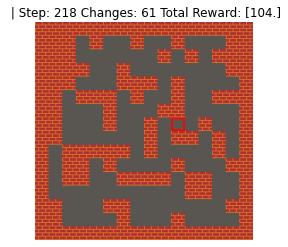

{'regions': 1, 'path-length': 47, 'path-imp': 23, 'iterations': 219, 'changes': 62, 'max_iterations': 38416, 'max_changes': 196, 'terminal_observation': array([[[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]

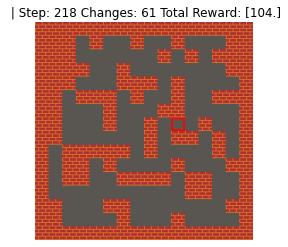

In [21]:
def show_state(env, step=0, changes=0, total_reward=0, name=""):
    fig = plt.figure(10)
    plt.clf()
    plt.title("{} | Step: {} Changes: {} Total Reward: {}".format(name, step, changes, total_reward))
    plt.axis('off')
    plt.imshow(env.render(mode='rgb_array'))
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
def infer(env, agent, **kwargs):
    obs = env.reset()
    dones = False
    total_rewards = 0
    while not dones:
        action, _ = agent.predict(obs)
        obs, rewards, dones, info = env.step(action)
        total_rewards += rewards
        if dones:
            break
        show_state(env, info[0]['iterations'], info[0]['changes'], total_rewards)
    if kwargs.get('verbose', False):
        print(info[0])
    return total_rewards

infer(env, agent, **kwargs)

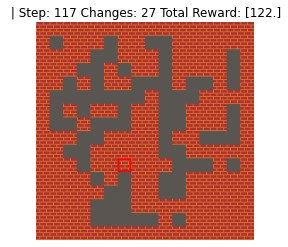

In [ ]:
total_rewards_arr=[]
for i in range(100):
    total_rewards_arr.append(infer(env, agent, **kwargs))
sum = 0
sum+= [r for r in total_rewards_arrs]


In [ ]:
print(total_rewards_arr)

In [1]:
import gym
import gym_pcgrl

env = gym.make('sokoban-narrow-v0')
obs = env.reset()
for t in range(1000):
  action = env.action_space.sample()
  obs, reward, done, info = env.step(action)
  env.render('human')
  if done:
    print("Episode finished after {} timesteps".format(t+1))
    break

Episode finished after 9 timesteps
